14:02:31 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


14:02:31 - cmdstanpy - INFO - CmdStan done processing.


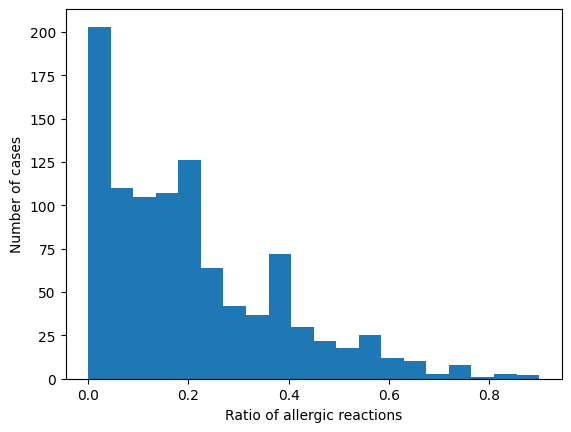

In [24]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# compile the model
priormodel = CmdStanModel(stan_file='prior.stan')

# generate samples
samples = priormodel.sample(fixed_param=True, iter_sampling=1000, iter_warmup=0, chains=1)

# calculate ratio of allergic reactions for each sample
calratio =samples.draws_pd()
ratios =[]
for i in range(1000):
    ratios.append(calratio.y[i]/50)

# create histogram of ratios
plt.hist(ratios, bins=20)
plt.xlabel('Ratio of allergic reactions')
plt.ylabel('Number of cases')
plt.show()


In [25]:
meanratio=np.mean(ratios)
meanratio

0.20516000000000004

In [26]:
#Prior predicted value is correct to computed analyze

In [27]:
#Posterior distribution

In [28]:
posteriormodel = CmdStanModel(stan_file='posterior.stan')

# generate samples
samples2=posteriormodel.sample(data={'N':50, 'y':7},fixed_param=True, iter_sampling=1000, iter_warmup=0, chains=1)


14:02:33 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


14:02:33 - cmdstanpy - INFO - CmdStan done processing.


In [29]:
df_1 = samples2.draws_pd()
df_1

,lp__,accept_stat__,p,y_pred
0,0.0,0.0,0.372051,26.0
1,0.0,0.0,0.372051,19.0
2,0.0,0.0,0.372051,17.0
3,0.0,0.0,0.372051,20.0
4,0.0,0.0,0.372051,18.0
...,...,...,...,...
995,0.0,0.0,0.372051,19.0
996,0.0,0.0,0.372051,17.0
997,0.0,0.0,0.372051,21.0
998,0.0,0.0,0.372051,17.0


In [30]:

y_pred_samples = samples2.stan_variable("y_pred")



In [31]:
allergic_reaction_ratio_1 = y_pred_samples / 50

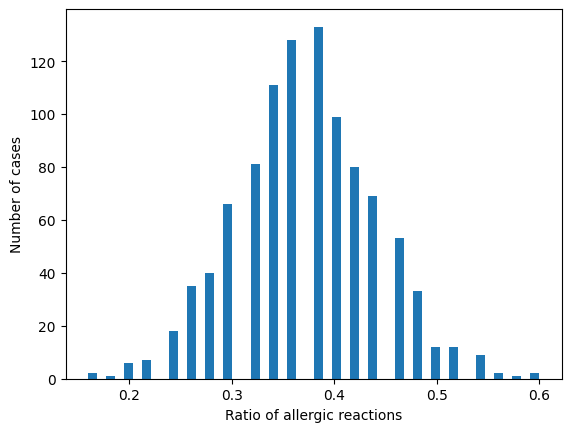

In [32]:
plt.hist(allergic_reaction_ratio_1, bins=50)
plt.xlabel('Ratio of allergic reactions')
plt.ylabel('Number of cases')
plt.show()

In [33]:
meanratio2=allergic_reaction_ratio_1.mean()
meanratio2

0.37172000000000005

In [34]:
#compute expected value and 94% density interval of predicted ratio 
ratio_ci = az.from_dict(posterior={'p':df_1.p, 'ratio': allergic_reaction_ratio_1})

p  = az.summary(ratio_ci, var_names='p', hdi_prob=0.94,round_to=3)
allergic_rate = az.summary(ratio_ci, var_names='ratio', hdi_prob=0.94, round_to=3)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


In [35]:
print(p)


    mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
p  0.372  0.0   0.372    0.372        0.0      0.0    1000.0    1000.0    NaN


In [36]:

print(allergic_rate)

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
ratio  0.372  0.068    0.24     0.48      0.002    0.002    796.86   935.241   

       r_hat  
ratio    NaN  


In [37]:

trad_p = 0.2
ratio_count = (allergic_reaction_ratio_1 < trad_p).sum()
ratio_prob = ratio_count/len(allergic_reaction_ratio_1)
print('Probability that ratio is lower than traditional vaccines: {:.2f}%'.format(ratio_prob*100))

Probability that ratio is lower than traditional vaccines: 0.30%
